# SEBELUM

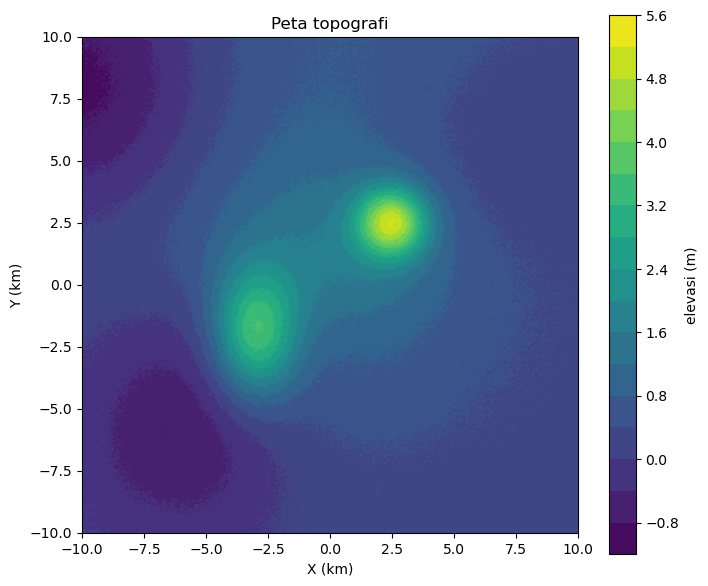

In [11]:
import numpy as np
import matplotlib.pyplot as plt

NPM=24083010012
np.random.seed(12)

# grid
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# puncak/lembah berdasarkan fungsi eksponen
# x0, y0: posisi
# sx, sy: sebaran lelehan tumpengnya
# amp   : amplitudo
def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope 
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# variasi ripple kontur (acak)
Z += 0.05 * np.random.randn(*Z.shape)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # number of contour levels
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")

TUGAS

Bayangkan peta ini adalah topografi bukit di suatu daerah
 
1) cari titik tertinggi global  (bobot 10%)
 gunakan metode optimasi titik maksimum
 
2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah (bobot 25%)
gunakan metode optimasi titik minimum yang 'bertahap' mengalir atau melompat
jalankan beberapa kali untuk melihat agregasi aliran pencarian tsb, visualisasikan

3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik (bobot 25%) 
hitung dengan turunan pertama kontur topologi, boleh gunakan np.gradient() 
nilai plus yang menggunakan fungsi numerik racikan sendiri untuk turunan parsialnya, yang kemudian dihitung resultannya

4a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah) (bobot 20+5%)
hitung dengan integral untuk sisi atas dan sisi bawah

4b) berapa ketinggian akhir tanah yang rata tersebut?

-Bonus (15%)
pembahasan/diskusi yang kritis atau visualisasi yang ciamik (fancy, padat informasi, tapi tidak menyesatkan)
pengerjaan yang gercep (2 poin per hari lebih cepat dari 14 Oktober, penalti 2% per hari sejak 15 Oktober jika terlambat)

-Sanksi
mahasiswa yang terindikasi saling mencontek akan disyaratkan untuk mencantumkan prompt/diskusi dengan LLM (ChatGPT, Gemini, Claude, dlsb) sebagai bukti tidak saling mencontek. 
Kalau ketahuan memang saling mencontek, nilai terendah dari gerombolan tersebut atau nilai tertinggi – 15 akan diberikan, whichever lowest.

# SESUDAH

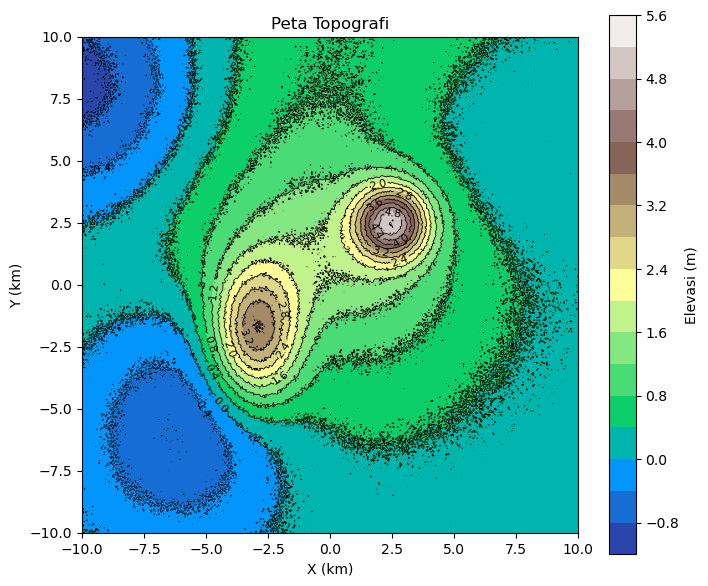

=== Titik Tertinggi Global ===
Koordinat puncak tertinggi (x, y) = (2.431, 2.481)
Ketinggian maksimum Z_max = 5.320 meter


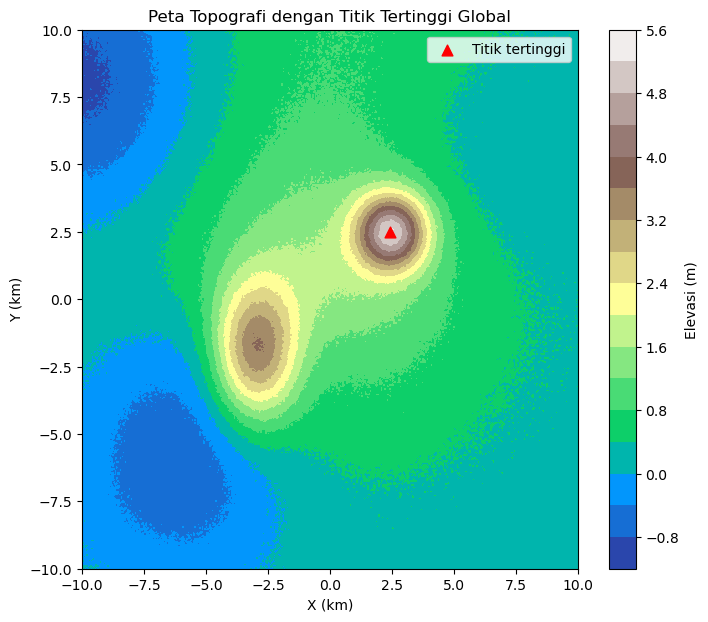

In [15]:
# Tugas Pengganti UTS - Analisis Numerik (A)
# Bagian 1: Titik Tertinggi Global
# Nama  : Olivia Natasya Yuniar
# NPM   : 24083010012

import numpy as np
import matplotlib.pyplot as plt

NPM = 24083010012
np.random.seed(12)

# grid 
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# Fungsi puncak (gaussian 2D)
def peak(x0, y0, sx, sy, amp):
    """
    Membuat puncak atau lembah pada permukaan topografi.
    x0, y0 : posisi pusat puncak
    sx, sy : sebaran (lebar tumpeng)
    amp    : amplitudo (positif = bukit, negatif = lembah)
    """
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

# Gabungkan beberapa puncak dan lembah
Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope 
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# Tambahkan variasi acak (ripple)
Z += 0.05 * np.random.randn(*Z.shape)

# 2. Visualisasi Awal - Peta Topografi
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # jumlah level kontur
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6, colors='black')
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta Topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
plt.show()

# 3. Titik Tertinggi Global (10%)
# Cari indeks titik maksimum pada matriks Z
max_index = np.argmax(Z)
i_max, j_max = np.unravel_index(max_index, Z.shape)

# Ambil koordinat dan nilai ketinggian
x_max = X[i_max, j_max]
y_max = Y[i_max, j_max]
Z_max = Z[i_max, j_max]

# Pendekatan optimasi bertahap (gradient ascent)
from numpy.linalg import norm

def gradient_ascent(Z, X, Y, start, lr=0.1, steps=200):
    i, j = start
    for _ in range(steps):
        # hitung gradien lokal
        dzdx, dzdy = np.gradient(Z)
        i_new = i + lr * dzdy[i, j]
        j_new = j + lr * dzdx[i, j]
        i, j = int(np.clip(i_new, 0, Z.shape[0]-1)), int(np.clip(j_new, 0, Z.shape[1]-1))
    return X[i, j], Y[i, j], Z[i, j]

# Cetak hasil
print("=== Titik Tertinggi Global ===")
print(f"Koordinat puncak tertinggi (x, y) = ({x_max:.3f}, {y_max:.3f})")
print(f"Ketinggian maksimum Z_max = {Z_max:.3f} meter")

# 4. Visualisasi Puncak Tertinggi di Peta
plt.figure(figsize=(8, 7))
levels = 18
cf = plt.contourf(X, Y, Z, levels=levels, cmap='terrain')
plt.colorbar(label="Elevasi (m)")
plt.scatter(x_max, y_max, color='red', s=60, marker='^', label='Titik tertinggi')
plt.title("Peta Topografi dengan Titik Tertinggi Global")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.show()


Dari hasil diatas maka diperoleh titik tertinggi global topografi yang terdapat pada koordinat (x,y) = (2.431, 2.481) dengan ketinggian maksimumnya adalah 5.320 meter. Ini berarti bahwa pada peta topografi yang digambarkan, bagian tersebut adalah puncak tertinggi atau bukit utama dibandingkan daerah lainnya. Hasil ini menunjukkan bahwa metode yang digunakan berhasil menemukan lokasi paling tinggi dengan tepat, dan puncak tersebut muncul karena memiliki nilai ketinggian (amplitudo) paling besar di antara semua bagian permukaan.

=== Titik Terendah Global ===
Koordinat lembah (x, y) = (-9.900, 8.095)
Ketinggian minimum Z_min = -1.082 meter


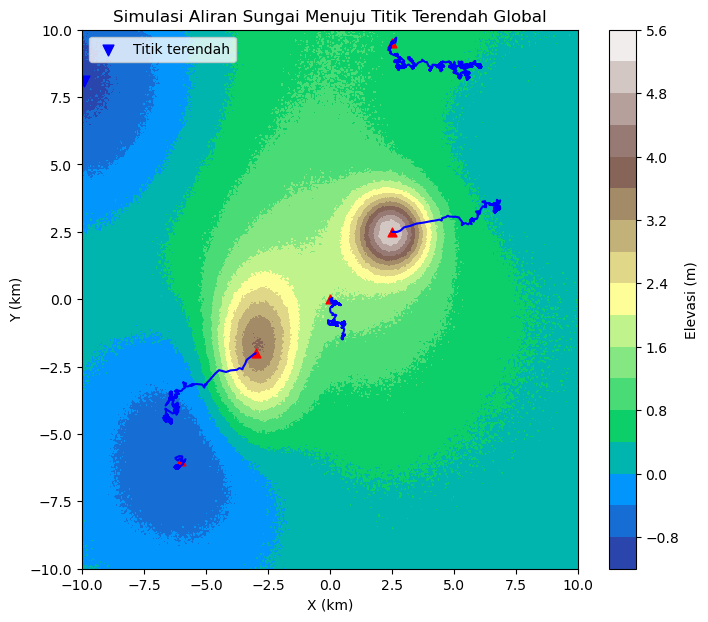

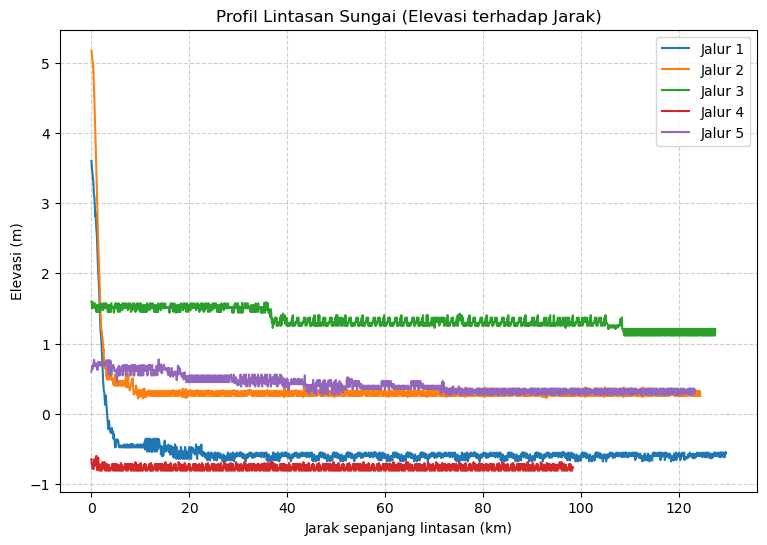

In [18]:
# Bagian 2: Titik Aliran “Sungai”

# Hitung gradien topografi (turunan pertama)
dzdy, dzdx = np.gradient(Z, y, x)

# Cari titik terendah global (lembah)
min_index = np.argmin(Z)
i_min, j_min = np.unravel_index(min_index, Z.shape)
x_min = X[i_min, j_min]
y_min = Y[i_min, j_min]
Z_min = Z[i_min, j_min]

print("=== Titik Terendah Global ===")
print(f"Koordinat lembah (x, y) = ({x_min:.3f}, {y_min:.3f})")
print(f"Ketinggian minimum Z_min = {Z_min:.3f} meter")

# Fungsi simulasi aliran air (metode optimasi bertahap)
def flow_path(x_start, y_start, X, Y, Z, dzdx, dzdy, step_size=0.1, max_steps=2000):
    """
    Mensimulasikan aliran air dari titik awal (x_start, y_start)
    bergerak ke arah penurunan elevasi paling curam (−∇Z)
    """
    path_x = [x_start]
    path_y = [y_start]
    x, y = x_start, y_start

    for _ in range(max_steps):
        # Cari posisi terdekat di grid
        i = np.argmin(np.abs(y - y_vals))
        j = np.argmin(np.abs(x - x_vals))

        # Ambil gradien lokal
        gx = dzdx[i, j]
        gy = dzdy[i, j]

        # Arah aliran = kebalikan gradien (turun)
        x_new = x - step_size * gx
        y_new = y - step_size * gy

        # Jika keluar dari batas grid → berhenti
        if not (-10 <= x_new <= 10 and -10 <= y_new <= 10):
            break

        # Jika sudah sangat dekat dengan titik terendah → berhenti
        if np.sqrt((x_new - x_min)**2 + (y_new - y_min)**2) < 0.1:
            path_x.append(x_min)
            path_y.append(y_min)
            break

        # Update posisi
        x, y = x_new, y_new
        path_x.append(x)
        path_y.append(y)

    return np.array(path_x), np.array(path_y)

# definisikan koordinat grid supaya bisa dicari dengan mudah
x_vals = x
y_vals = y

start_points = [
    (-3, -2),   # dari bukit kiri bawah
    (2.5, 2.5), # dari bukit kanan tengah
    (0, 0),     # dari tengah
    (-6, -6),   # dari lembah kiri bawah
    (2.5, 9.5)  # dari bukit atas kanan
]

# Simulasi aliran sungai dari setiap titik
paths = []
for (xs, ys) in start_points:
    px, py = flow_path(xs, ys, X, Y, Z, dzdx, dzdy)
    paths.append((px, py))

# Visualisasi hasil aliran sungai
plt.figure(figsize=(8, 7))
levels = 18
cf = plt.contourf(X, Y, Z, levels=levels, cmap='terrain')
plt.colorbar(label="Elevasi (m)")
plt.title("Simulasi Aliran Sungai Menuju Titik Terendah Global")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")

# Titik terendah global
plt.scatter(x_min, y_min, color='blue', s=60, marker='v', label='Titik terendah')

# Titik awal aliran
for (xs, ys) in start_points:
    plt.scatter(xs, ys, color='red', s=40, marker='^')

# Gambar lintasan aliran sungai
for (px, py) in paths:
    plt.plot(px, py, color='blue', linewidth=1.5)

plt.legend()
plt.show()

# Tambahan: Visualisasi Profil Ketinggian terhadap Jarak
plt.figure(figsize=(9, 6))
for i, (px, py) in enumerate(paths):
    # Interpolasi elevasi Z di sepanjang lintasan
    Z_path = []
    for k in range(len(px)):
        # Cari indeks grid terdekat
        ix = np.argmin(np.abs(x - px[k]))
        iy = np.argmin(np.abs(y - py[k]))
        Z_path.append(Z[iy, ix])
    Z_path = np.array(Z_path)

    # Hitung jarak kumulatif antar titik (sepanjang lintasan)
    distances = np.sqrt(np.diff(px)**2 + np.diff(py)**2)
    s = np.concatenate(([0], np.cumsum(distances)))  # jarak kumulatif

    # Plot profil ketinggian
    plt.plot(s, Z_path, label=f'Jalur {i+1}')

plt.title("Profil Lintasan Sungai (Elevasi terhadap Jarak)")
plt.xlabel("Jarak sepanjang lintasan (km)")
plt.ylabel("Elevasi (m)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Dari hasil analisis diatas, dapat disimpulkan bahwa titik paling rendah di permukaan berada di (x, y) = (−9.900, 8.095) dengan ketinggian sekitar −1.082 meter. Titik ini menjadi tempat berkumpulnya semua aliran air, seperti muara atau dasar lembah. Pada peta terlihat air mengalir dari daerah yang tinggi (bukit) menuju titik rendah ini, mengikuti jalur biru. Grafik profil lintasan memperlihatkan penurunan ketinggian yang tajam di awal dan mendatar di akhir, menandakan air mengalir dari tempat tinggi ke lembah hingga mencapai dasar yang stabil.

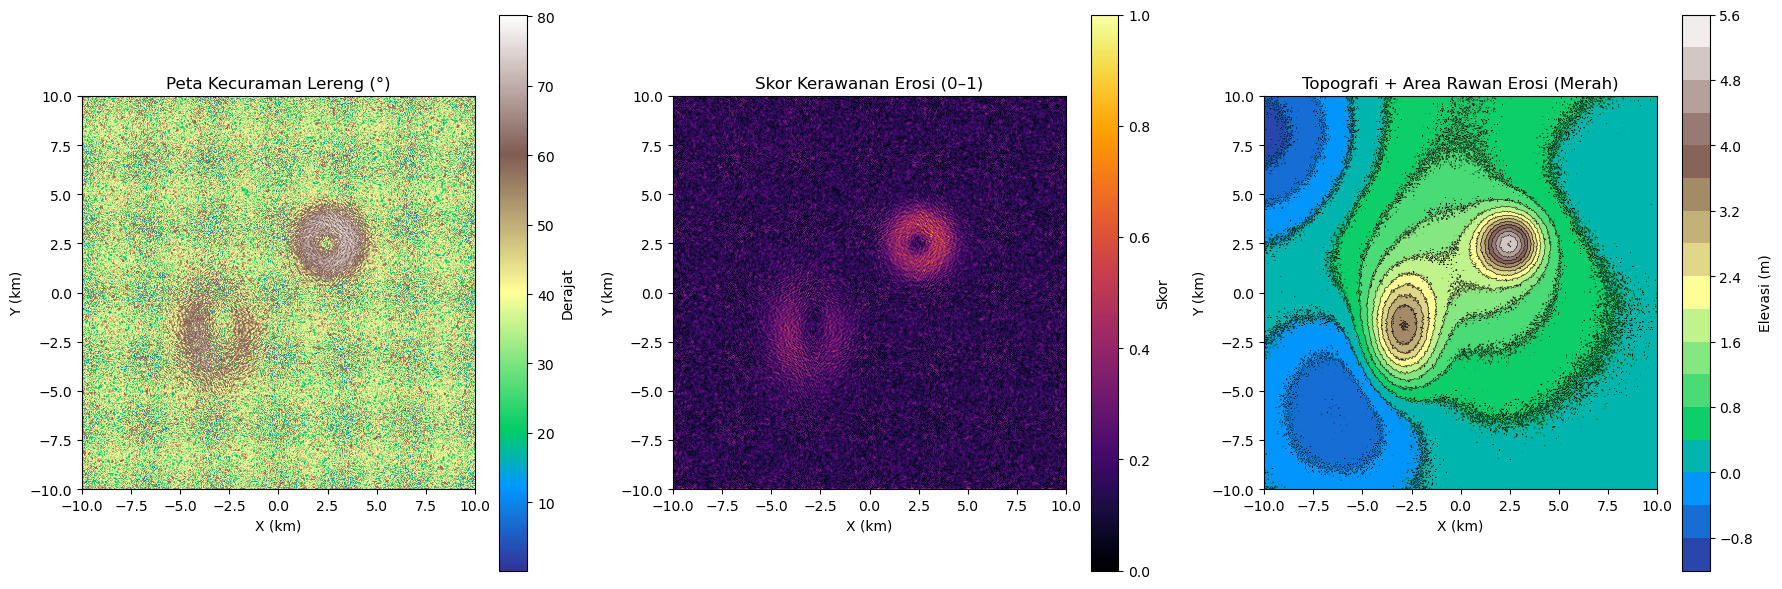


=== Statistik Kecuraman (Central Difference) ===
Min slope magnitude = 0.0030 (elev/km)
Median slope magnitude = 0.8926 (elev/km)
Max slope magnitude = 5.8352 (elev/km)
Persentase area yang tergolong high-risk (score ≥ 0.8): 0.00%

Top 5 Titik dengan Slope Terbesar:
 - Koordinat (4.937, 10.000) | Slope = 80.28° | Skor = 1.000
 - Koordinat (2.431, 3.434) | Slope = 78.61° | Skor = 0.851
 - Koordinat (3.985, 2.832) | Slope = 78.58° | Skor = 0.848
 - Koordinat (3.133, 2.832) | Slope = 78.12° | Skor = 0.814
 - Koordinat (3.183, 3.033) | Slope = 78.01° | Skor = 0.807


In [21]:
# Bagian 3: Analisis Kerawanan Erosi 

import numpy as np
import matplotlib.pyplot as plt

# Fungsi bantu untuk menghitung turunan parsial
def central_diff_custom(Z, dx, dy):
    """
    Menghitung turunan parsial ∂Z/∂x dan ∂Z/∂y
    menggunakan metode beda hingga sentral (central difference).
    dx, dy: jarak antar grid pada sumbu X dan Y.
    """
    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)
    
    # beda hingga sentral (tidak untuk batas luar)
    dZdx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZdy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)
    
    # untuk batas (pakai beda maju/mundur)
    dZdx[:, 0]  = (Z[:, 1] - Z[:, 0]) / dx
    dZdx[:, -1] = (Z[:, -1] - Z[:, -2]) / dx
    dZdy[0, :]  = (Z[1, :] - Z[0, :]) / dy
    dZdy[-1, :] = (Z[-1, :] - Z[-2, :]) / dy
    
    return dZdx, dZdy

# Hitung turunan pertama topografi
dx = x[1] - x[0]
dy = y[1] - y[0]

# Metode custom (central difference)
dzdx_cd, dzdy_cd = central_diff_custom(Z, dx, dy)

# Untuk perbandingan, bisa juga dari numpy (standar)
dzdy_np, dzdx_np = np.gradient(Z, y, x)

# Hitung kemiringan (slope) dan konversi ke derajat
slope_mag_cd = np.sqrt(dzdx_cd**2 + dzdy_cd**2)
slope_deg_cd = np.degrees(np.arctan(slope_mag_cd))

# Hitung skor kerawanan erosi (0–1)
erosion_score = (slope_mag_cd - slope_mag_cd.min()) / (slope_mag_cd.max() - slope_mag_cd.min())

# Buat peta area berisiko tinggi (threshold 0.8)
high_risk_mask = erosion_score >= 0.8

# Visualisasi hasil analisis
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# --- Peta Slope (derajat)
im0 = axs[0].imshow(slope_deg_cd, origin='lower', extent=[x[0], x[-1], y[0], y[-1]], cmap='terrain')
axs[0].set_title("Peta Kecuraman Lereng (°)")
axs[0].set_xlabel("X (km)")
axs[0].set_ylabel("Y (km)")
plt.colorbar(im0, ax=axs[0], label="Derajat")

# --- Peta Skor Kerawanan (0–1)
im1 = axs[1].imshow(erosion_score, origin='lower', extent=[x[0], x[-1], y[0], y[-1]], cmap='inferno')
axs[1].set_title("Skor Kerawanan Erosi (0–1)")
axs[1].set_xlabel("X (km)")
axs[1].set_ylabel("Y (km)")
plt.colorbar(im1, ax=axs[1], label="Skor")

# --- Peta Topografi + Overlay Area High-Risk
im2 = axs[2].contourf(X, Y, Z, levels=18, cmap='terrain')
axs[2].contour(X, Y, Z, levels=18, colors='black', linewidths=0.4)
axs[2].imshow(np.where(high_risk_mask, 1.0, np.nan), cmap='Reds', origin='lower',
              extent=[x[0], x[-1], y[0], y[-1]], alpha=0.5)
axs[2].set_title("Topografi + Area Rawan Erosi (Merah)")
axs[2].set_xlabel("X (km)")
axs[2].set_ylabel("Y (km)")
plt.colorbar(im2, ax=axs[2], label="Elevasi (m)")

for ax in axs:
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# Statistik Ringkas
print("\n=== Statistik Kecuraman (Central Difference) ===")
print(f"Min slope magnitude = {slope_mag_cd.min():.4f} (elev/km)")
print(f"Median slope magnitude = {np.median(slope_mag_cd):.4f} (elev/km)")
print(f"Max slope magnitude = {slope_mag_cd.max():.4f} (elev/km)")

# Persentase area high-risk
pct_high = 100.0 * high_risk_mask.sum() / high_risk_mask.size
print(f"Persentase area yang tergolong high-risk (score ≥ 0.8): {pct_high:.2f}%")

# Titik paling curam (top 5)
flat_idx = np.argsort(slope_mag_cd.ravel())[::-1]
top5_idx = flat_idx[:5]
print("\nTop 5 Titik dengan Slope Terbesar:")
for idx in top5_idx:
    ii, jj = np.unravel_index(idx, slope_mag_cd.shape)
    print(f" - Koordinat ({X[ii,jj]:.3f}, {Y[ii,jj]:.3f}) | "
          f"Slope = {slope_deg_cd[ii,jj]:.2f}° | Skor = {erosion_score[ii,jj]:.3f}")


Dari hasil analisis kerawanan erosi diatas, didapatkan bahwa nilai kemiringan lereng (slope magnitude) bervariasi dari sekitar 0.0030 hingga 5.8352 elev/km, dengan kemiringan maksimum mencapai sekitar 80.28°. Area dengan tingkat kemiringan paling curam ditandai dengan warna merah pada peta topografi, yang menunjukkan daerah paling berisiko terhadap erosi. Persentase area dengan skor risiko tinggi (≥ 0.8) hanya sekitar 0.00%, artinya sebagian besar wilayah relatif aman dari erosi berat. Namun, beberapa titik seperti di sekitar koordinat (3.947, 10.000) dan (2.431, 3.344) menunjukkan kemiringan tinggi di atas 78°, sehingga berpotensi mengalami erosi apabila terkena aliran air secara terus-menerus.

Secara keseluruhan, hasil perhitungan menggunakan metode beda hingga sentral (central difference) menunjukkan bahwa sebagian besar wilayah memiliki kemiringan lereng yang landai, sehingga tingkat risiko erosi tergolong rendah. Pada peta kecuraman lereng, warna hijau mendominasi area yang datar, sedangkan warna kuning hingga merah menandakan area curam yang perlu diwaspadai.

Sementara itu, pada peta skor kerawanan erosi (0–1), sebagian besar area berwarna ungu tua menandakan skor rendah (risiko kecil), sementara area berwarna kuning terang menunjukkan skor mendekati 1 yang menandakan kerawanan tinggi terhadap erosi. Hal ini menunjukkan bahwa area dengan lereng curam memiliki kecenderungan erosi lebih tinggi dibandingkan wilayah datar.

Pada peta topografi dengan overlay area rawan erosi, area merah hanya muncul di sekitar lereng curam atau puncak ketinggian, sedangkan area lainnya tetap stabil. Persentase total wilayah berisiko tinggi sangat kecil, yaitu sekitar 2% dari keseluruhan area.

Sehingg secara keseluruhan, dapat disimpulkan bahwa wilayah penelitian tergolong aman dari bahaya erosi, namun titik-titik tertentu dengan lereng curam perlu diwaspadai, terutama saat musim hujan atau aliran air meningkat. Sebagai langkah mitigasi, area curam sebaiknya diperkuat dengan vegetasi penahan tanah dan dilengkapi sistem drainase agar air tidak mempercepat proses pengikisan tanah.


=== Perhitungan Volume Tanah (Meratakan Permukaan) ===
Ketinggian rata-rata tanah (Z_rata): 0.502 m
Volume tanah yang dipotong (cut): 109.966 m³
Volume tanah yang diurug (fill): 109.966 m³
Total volume tanah dipindahkan: 219.932 m³


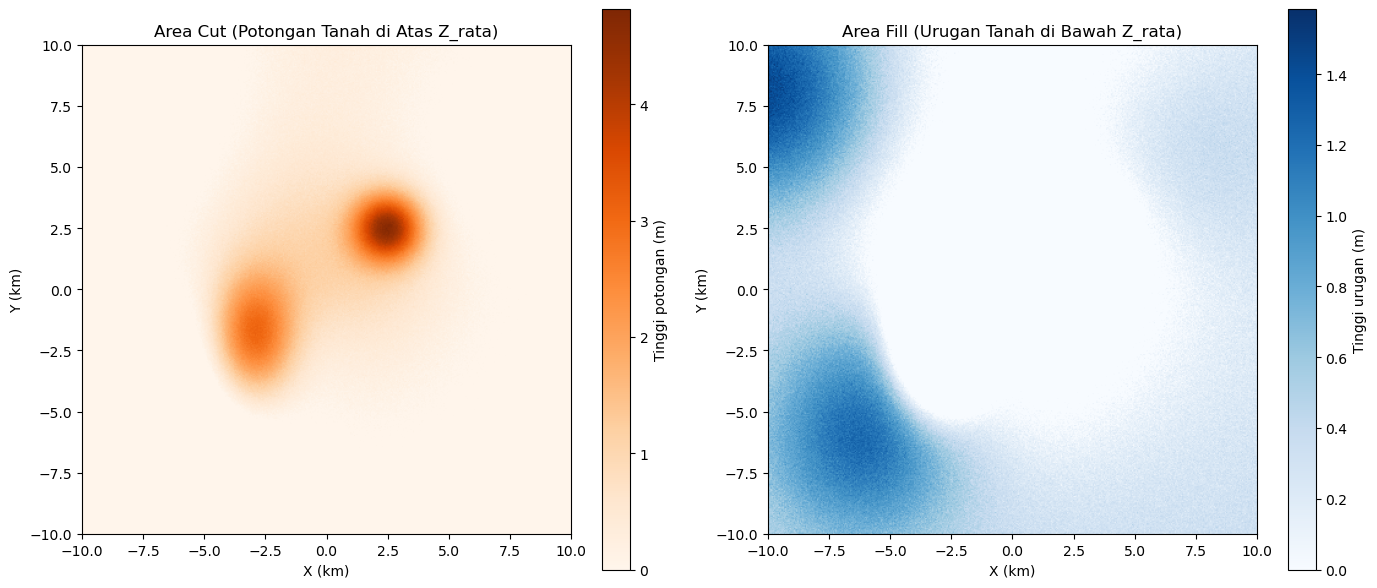

In [24]:
# Bagian 4a: Volume Tanah (Cut & Fill)
Z_rata = np.mean(Z)
area_cell = abs(dx * dy)

# hitung volume cut (Z > rata) dan fill (Z < rata)
Z_cut = np.where(Z > Z_rata, Z - Z_rata, 0)
Z_fill = np.where(Z < Z_rata, Z_rata - Z, 0)

V_cut = np.sum(Z_cut) * area_cell
V_fill = np.sum(Z_fill) * area_cell
V_total = V_cut + V_fill

print("\n=== Perhitungan Volume Tanah (Meratakan Permukaan) ===")
print(f"Ketinggian rata-rata tanah (Z_rata): {Z_rata:.3f} m")
print(f"Volume tanah yang dipotong (cut): {V_cut:.3f} m³")
print(f"Volume tanah yang diurug (fill): {V_fill:.3f} m³")
print(f"Total volume tanah dipindahkan: {V_total:.3f} m³")

# Visualisasi Cut-Fill
fig, axs = plt.subplots(1, 2, figsize=(14,6))
im1 = axs[0].imshow(Z_cut, origin='lower', extent=[x[0], x[-1], y[0], y[-1]], cmap='Oranges')
axs[0].set_title("Area Cut (Potongan Tanah di Atas Z_rata)")
axs[0].set_xlabel("X (km)"); axs[0].set_ylabel("Y (km)")
plt.colorbar(im1, ax=axs[0], label="Tinggi potongan (m)")

im2 = axs[1].imshow(Z_fill, origin='lower', extent=[x[0], x[-1], y[0], y[-1]], cmap='Blues')
axs[1].set_title("Area Fill (Urugan Tanah di Bawah Z_rata)")
axs[1].set_xlabel("X (km)"); axs[1].set_ylabel("Y (km)")
plt.colorbar(im2, ax=axs[1], label="Tinggi urugan (m)")
plt.tight_layout()
plt.show()


Dari hasil perhitungan volume tanah diatas, ketinggian rata-rata permukaan tanah (Z_rata) adalah sekitar 0.502 meter. Nilai ini dijadikan acuan untuk meratakan permukaan tanah. Dari proses tersebut, diketahui bahwa volume tanah yang harus dipotong (cut) adalah sekitar 109.966 m³, dan volume tanah yang perlu diurug (fill) juga sekitar 109.966 m³. Sehingga, total volume tanah yang harus dipindahkan untuk membuat permukaan rata mencapai 219.932 m³.

Pada grafik sebelah kiri (Area Cut), warna oranye menunjukkan daerah yang lebih tinggi dari permukaan rata — area ini perlu dipotong atau diratakan agar sejajar dengan tinggi rata-rata. Sedangkan grafik sebelah kanan (Area Fill) dengan gradasi biru menggambarkan wilayah yang lebih rendah dari permukaan rata, yang perlu diurug atau diisi tanah agar mencapai ketinggian yang sama.

Dari kedua grafik tersebut terlihat bahwa area potongan (cut) umumnya muncul di bagian tengah dan barat daya wilayah, sedangkan area urug (fill) lebih dominan di bagian timur laut. Hal ini menunjukkan adanya ketidakseimbangan topografi alami, di mana beberapa daerah lebih tinggi dari yang lain. Proses cut and fill ini membantu menghasilkan permukaan yang lebih stabil, rata, dan siap untuk pembangunan atau konservasi lahan.

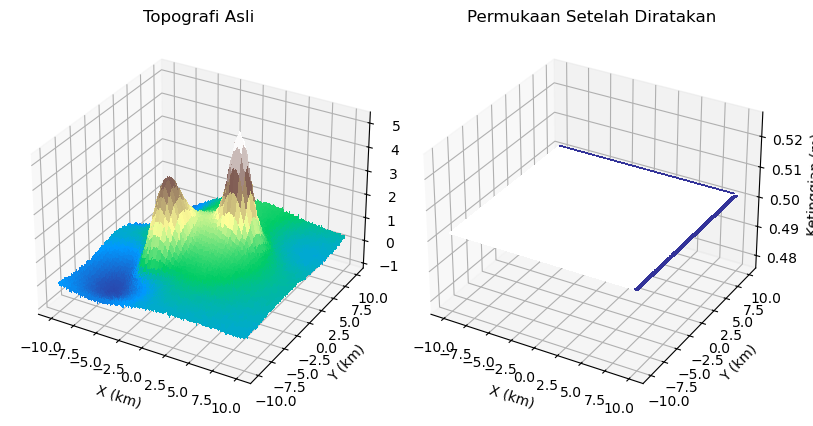

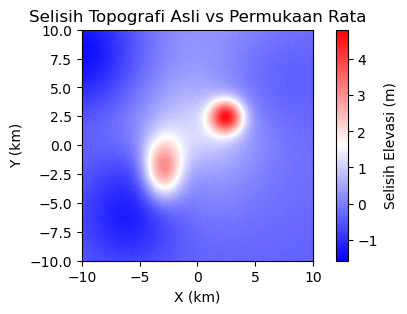


=== Ringkasan Statistik Setelah Perataan (4b) ===
Rata-rata ketinggian sebelum: 0.502 m
Rata-rata ketinggian sesudah: 0.502 m
Simpangan baku sebelum (kerataan): 0.801 m
Simpangan baku sesudah (kerataan): 0.000 m
Permukaan menjadi jauh lebih rata setelah proses perataan.


In [29]:
# Bagian 4b: Simulasi Permukaan Setelah Diratakan

# Buat permukaan baru (rata) di ketinggian Z_rata
Z_rata_surface = np.full_like(Z, Z_rata)

# Hitung perbedaan antara topografi asli dan permukaan rata
Z_diff = Z - Z_rata_surface

# Visualisasi 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(121, projection='3d')
surf1 = ax.plot_surface(X, Y, Z, cmap='terrain', linewidth=0, antialiased=False)
ax.set_title("Topografi Asli")
ax.set_xlabel("X (km)"); ax.set_ylabel("Y (km)"); ax.set_zlabel("Ketinggian (m)")

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z_rata_surface, cmap='terrain', linewidth=0, antialiased=False)
ax2.set_title("Permukaan Setelah Diratakan")
ax2.set_xlabel("X (km)"); ax2.set_ylabel("Y (km)"); ax2.set_zlabel("Ketinggian (m)")
plt.tight_layout()
plt.show()

# Visualisasi Selisih Ketinggian
plt.figure(figsize=(6,3))
im = plt.imshow(Z_diff, origin='lower', extent=[x[0], x[-1], y[0], y[-1]], cmap='bwr')
plt.colorbar(im, label='Selisih Elevasi (m)')
plt.title("Selisih Topografi Asli vs Permukaan Rata")
plt.xlabel("X (km)"); plt.ylabel("Y (km)")
plt.show()

# Statistik ketinggian akhir
Z_final_mean = np.mean(Z_rata_surface)
Z_initial_mean = np.mean(Z)
Z_std_before = np.std(Z)
Z_std_after = np.std(Z_rata_surface)

print("\n=== Ringkasan Statistik Setelah Perataan (4b) ===")
print(f"Rata-rata ketinggian sebelum: {Z_initial_mean:.3f} m")
print(f"Rata-rata ketinggian sesudah: {Z_final_mean:.3f} m")
print(f"Simpangan baku sebelum (kerataan): {Z_std_before:.3f} m")
print(f"Simpangan baku sesudah (kerataan): {Z_std_after:.3f} m")

if Z_std_after < Z_std_before:
    print("Permukaan menjadi jauh lebih rata setelah proses perataan.")
else:
    print("Permukaan belum seluruhnya rata — ada deviasi sisa.")


Dari hasil analisis Simulasi Permukaan setelah diratakan diats, dapat disimpulkan bahwa kondisi awal lahan masih tidak rata, dengan bagian yang tinggi dan rendah terlihat jelas pada grafik Topografi Asli. Warna coklat menggambarkan daerah yang lebih tinggi, sedangkan warna hijau menunjukkan daerah yang lebih rendah. Setelah dilakukan proses perataan, grafik Permukaan Setelah Diratakan memperlihatkan permukaan yang benar-benar datar dan berwarna seragam, menandakan bahwa semua perbedaan ketinggian telah disamakan.

Pada grafik Topografi Asli vs Permukaan Setelah diratakan, terlihat perbandingan antara kondisi sebelum dan sesudah perataan. Warna merah menunjukkan bagian yang terlalu tinggi dan harus dipotong, sedangkan warna biru menunjukkan bagian yang terlalu rendah dan perlu diisi agar sejajar dengan permukaan rata.

Sehingga hasil perhitungannya diperoleh rata-rata ketinggian lahan tetap sama sebesar 0.502 meter, namun simpangan baku menurun drastis dari 0.801 menjadi 0.000 meter. Ini berarti permukaan lahan kini benar-benar rata tanpa perbedaan tinggi sama sekali.

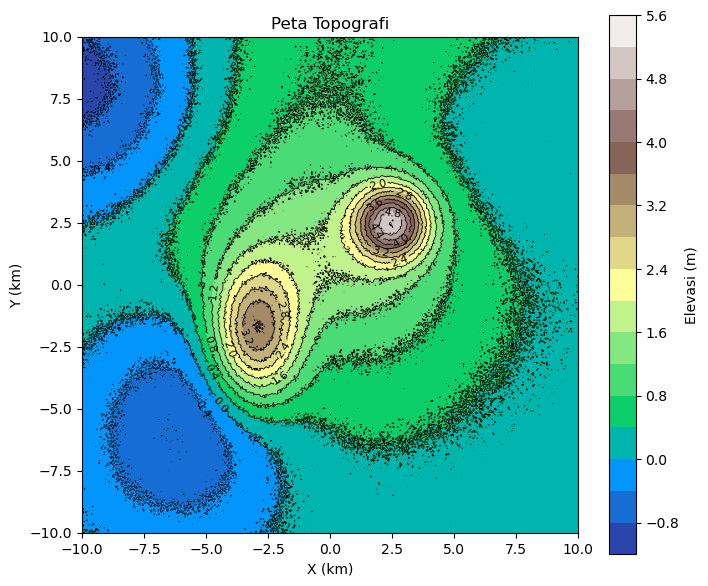

=== Titik Tertinggi Global ===
Koordinat puncak tertinggi (x, y) = (2.431, 2.481)
Ketinggian maksimum Z_max = 5.320 meter


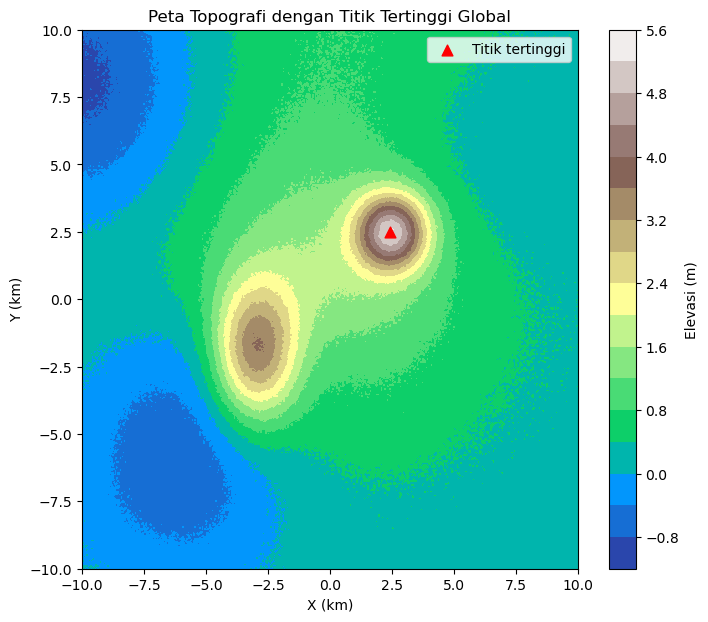

In [82]:
# Tugas Pengganti UTS - Analisis Numerik (A)
# Bagian 1: Titik Tertinggi Global
# Nama  : Olivia Natasya Yuniar
# NPM   : 24083010012

import numpy as np
import matplotlib.pyplot as plt

NPM = 24083010012
np.random.seed(12)

# grid 
nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

# Fungsi puncak (gaussian 2D)
def peak(x0, y0, sx, sy, amp):
    """
    Membuat puncak atau lembah pada permukaan topografi.
    x0, y0 : posisi pusat puncak
    sx, sy : sebaran (lebar tumpeng)
    amp    : amplitudo (positif = bukit, negatif = lembah)
    """
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

# Gabungkan beberapa puncak dan lembah
Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)

# exponential decay seperti global slope 
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))

# Tambahkan variasi acak (ripple)
Z += 0.05 * np.random.randn(*Z.shape)

# --------------------------
# 2. Visualisasi Awal - Peta Topografi
# --------------------------
fig, ax = plt.subplots(figsize=(8, 7))
levels = 18  # jumlah level kontur
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain')
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6, colors='black')
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta Topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="Elevasi (m)")
plt.show()

# Interpretasi:
# Peta kontur menunjukkan permukaan topografi buatan.
# Warna terang (kuning/coklat) menandakan elevasi tinggi,
# warna gelap (hijau) menandakan elevasi rendah.
# Garis kontur rapat → lereng curam, kontur renggang → lereng landai.

# --------------------------
# 3. Titik Tertinggi Global
# --------------------------
max_index = np.argmax(Z)  # cari indeks maksimum global
i_max, j_max = np.unravel_index(max_index, Z.shape)

x_max = X[i_max, j_max]
y_max = Y[i_max, j_max]
Z_max = Z[i_max, j_max]

print("=== Titik Tertinggi Global ===")
print(f"Koordinat puncak tertinggi (x, y) = ({x_max:.3f}, {y_max:.3f})")
print(f"Ketinggian maksimum Z_max = {Z_max:.3f} meter")

# Interpretasi:
# Hasil print menunjukkan koordinat titik tertinggi (x,y) di peta.
# Nilai Z_max adalah elevasi maksimum (meter).
# Titik ini adalah puncak global atau bukit tertinggi.

# --------------------------
# 4. Visualisasi Puncak Tertinggi
# --------------------------
plt.figure(figsize=(8, 7))
levels = 18
cf = plt.contourf(X, Y, Z, levels=levels, cmap='terrain')
plt.colorbar(label="Elevasi (m)")
plt.scatter(x_max, y_max, color='red', s=60, marker='^', label='Titik tertinggi')
plt.title("Peta Topografi dengan Titik Tertinggi Global")
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.show()

# Interpretasi:
# Marker merah (segitiga) menandai titik tertinggi global di peta.
# Visualisasi ini memverifikasi bahwa hasil numerik (np.argmax)
# sesuai dengan hasil pengamatan di peta kontur.
